# STA130_HW07

## 1.

**1. Simple vs. Multiple Linear Regression**

- **Simple Linear Regression**: Models the outcome as a straight-line relationship with a single predictor.
  
  Outcome = beta_0 + beta_1 * Predictor
  
- **Multiple Linear Regression**: Extends to multiple predictors, capturing more complex relationships.
  
  Outcome = beta_0 + beta_1 * PredictorA + beta_2 * PredictorB + ...

**2. Continuous vs. Indicator Variables in Simple Linear Regression**

- **Continuous Variable**: Each unit change in the predictor continuously scales the outcome by a factor beta_1.
  
  text{Outcome} = beta_0 + beta_1 * ContinuousVariable
 
- **Indicator Variable**: A binary variable that shifts the outcome up or down based on its state (e.g., 0 or 1).
  Outcome = beta_0 + beta_1 * IndicatorVariable

**3. Adding an Indicator Variable to Create a Multiple Linear Regression**

Adding an indicator variable to a continuous predictor in multiple regression:

Outcome = beta_0 + beta_1 * ContinuousVariable + beta_2 * IndicatorVariable

This adds separate lines for each indicator state, allowing the outcome to vary by both the continuous variable and the indicator.

**4. Adding an Interaction Between Continuous and Indicator Variables**

Including an interaction term in multiple regression:

Outcome = beta_0 + beta_1 * ContinuousVariable + beta_2 * IndicatorVariable + beta_3 * (ContinuousVariable * 1(IndicatorVariable))

This lets the model fit different slopes for the continuous predictor based on the indicator’s state, creating two lines with different slopes.

**5. Multiple Linear Regression with Indicator Variables from a Categorical Variable**

For a categorical variable with \(k\) levels, we use \(k-1\) indicator variables to represent each category compared to a baseline:

Outcome = beta_0 + beta_1 * 1(CategoryA) + beta_2 * 1(CategoryB) + ...

Each coefficient shows how each category affects the outcome relative to the baseline (omitted category), maintaining a clear interpretation of each effect.

## 2.

**1. Outcome and Predictor Variables**:
- **Outcome**: Effectiveness of advertising (like sales or engagement).
- **Predictors**: 
     - TV Advertising Budget
     - Online Advertising Budget

**2. Models Without and With Interaction**:
- **Without Interaction** (additive model):
    
    Outcome = beta_0 + beta_1 * TVBudget + beta_2 * OnlineBudget
     
     - Each budget’s effect on the outcome is independent of the other.
- **With Interaction** (interactive model):
     
     Outcome = beta_0 + beta_1 * TVBudget + beta_2 * OnlineBudget + beta_3 * (TVBudget * OnlineBudget)
    
- The interaction term (TVBudget * OnlineBudget) allows each budget's effect to depend on the other, capturing a synergistic relationship.

**3. Binary (High/Low) Budgets**:
- When categorizing budgets as high/low, use indicator variables:
     - **TVBudgetHigh**: 1 if high, 0 if low
     - **OnlineBudgetHigh**: 1 if high, 0 if low
- **Without Interaction** (additive model):
     
     Outcome = beta_0 + beta_1 * 1(TVBudgetHigh) + beta_2 * 1(OnlineBudgetHigh)
     
- The model estimates separate effects for high TV and high online budgets, assuming they don't influence each other.
- **With Interaction**:
     
     Outcome = beta_0 + beta_1 * 1(TVBudgetHigh) + beta_2 * 1(OnlineBudgetHigh) + beta_3 * (1(TVBudgetHigh) * 1(OnlineBudgetHigh))
    
- The interaction term captures any unique effect when both budgets are high.

**4. Prediction Differences**:
- **Additive models** assume independent effects, offering straightforward, combined predictions.
- **Interactive models** account for combined effects, useful if evidence shows a synergistic impact when both budgets are high. 

## 3.

In [2]:
import pandas as pd
import statsmodels.formula.api as smf

# Load your dataset (replace with your actual file path or URL)
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
data = pd.read_csv(url).fillna('None')

# Example: Convert categorical outcome to binary outcome
# This assumes 'Type 1' represents the primary type and we create a binary variable
data['FireType'] = (data['Type 1'] == 'Fire').astype(int)  # Binary outcome for logistic regression

# Creating example predictor variables (adjust according to your dataset)
data['HighAttack'] = (data['Attack'] > 60).astype(int)     # Binary predictor
data['Defense'] = data['Defense']                           # Continuous predictor


In [3]:
# Define an additive model (no interaction term)
additive_formula = 'FireType ~ HighAttack + Defense'
log_reg_additive = smf.logit(additive_formula, data=data).fit()
print(log_reg_additive.summary())


Optimization terminated successfully.
         Current function value: 0.236639
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               FireType   No. Observations:                  800
Model:                          Logit   Df Residuals:                      797
Method:                           MLE   Df Model:                            2
Date:                Tue, 12 Nov 2024   Pseudo R-squ.:                 0.01609
Time:                        02:08:24   Log-Likelihood:                -189.31
converged:                       True   LL-Null:                       -192.41
Covariance Type:            nonrobust   LLR p-value:                   0.04524
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2924      0.414     -5.538      0.000      -3.104      -1.481
HighAttack     0.6869      0.

In [4]:
# Define a synergistic model (with interaction term between HighAttack and Defense)
synergistic_formula = 'FireType ~ HighAttack * Defense'
log_reg_synergistic = smf.logit(synergistic_formula, data=data).fit()
print(log_reg_synergistic.summary())


Optimization terminated successfully.
         Current function value: 0.236086
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               FireType   No. Observations:                  800
Model:                          Logit   Df Residuals:                      796
Method:                           MLE   Df Model:                            3
Date:                Tue, 12 Nov 2024   Pseudo R-squ.:                 0.01839
Time:                        02:08:35   Log-Likelihood:                -188.87
converged:                       True   LL-Null:                       -192.41
Covariance Type:            nonrobust   LLR p-value:                   0.06948
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.7908      0.659     -4.234      0.000      -4.083      -1.499
HighA

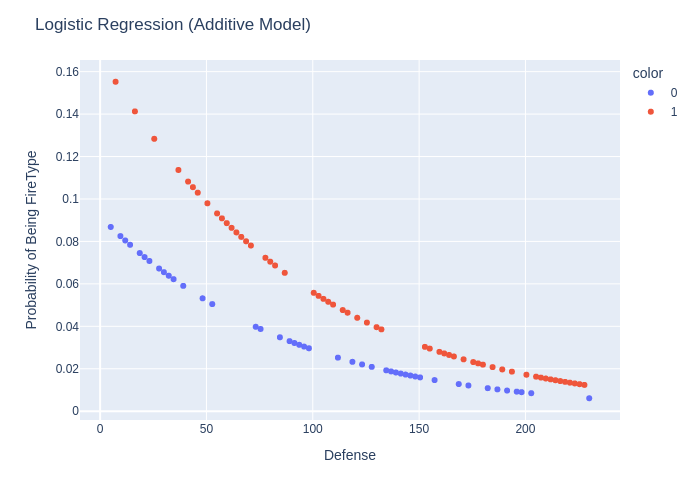

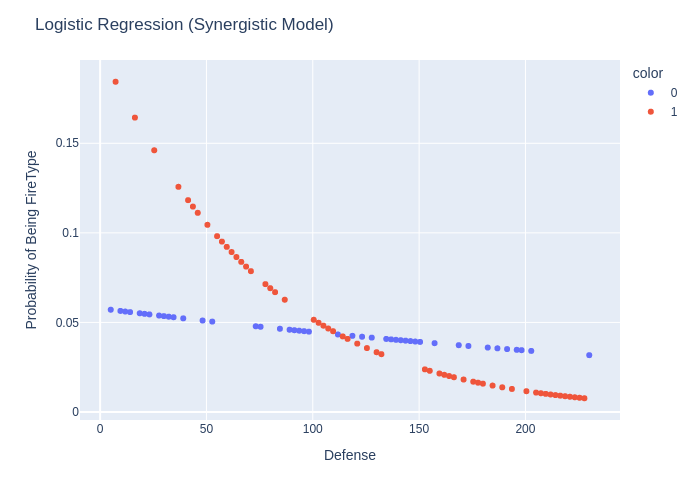

In [5]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Generate simulated data
np.random.seed(42)
simulated_defense = np.linspace(data['Defense'].min(), data['Defense'].max(), 100)
simulated_high_attack = np.random.choice([0, 1], size=100)

# Predict probabilities using the additive model
simulated_data = pd.DataFrame({
    'HighAttack': simulated_high_attack,
    'Defense': simulated_defense
})
simulated_data['AdditiveProb'] = log_reg_additive.predict(simulated_data)
simulated_data['SynergisticProb'] = log_reg_synergistic.predict(simulated_data)

# Plot Additive Model
fig_additive = px.scatter(simulated_data, x='Defense', y='AdditiveProb', color=simulated_data['HighAttack'].astype(str))
fig_additive.update_layout(title="Logistic Regression (Additive Model)",
                           xaxis_title="Defense",
                           yaxis_title="Probability of Being FireType")
fig_additive.show(renderer="png")

# Plot Synergistic Model
fig_synergistic = px.scatter(simulated_data, x='Defense', y='SynergisticProb', color=simulated_data['HighAttack'].astype(str))
fig_synergistic.update_layout(title="Logistic Regression (Synergistic Model)",
                              xaxis_title="Defense",
                              yaxis_title="Probability of Being FireType")
fig_synergistic.show(renderer="png")


## 4.

In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [7]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        02:23:13   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**1. R-Squared (Overall Model Fit)**:
- **Definition**: R-squared shows the percentage of variability in HP explained by the predictors.
- **Interpretation**: A low R-squared (17.6%) means that **most of the variability in HP is not explained** by the current predictors, suggesting other important factors might be missing from the model.

**2. P-Values and Coefficients (Individual Predictor Significance)**:
- **Definition**: P-values assess the significance of each predictor’s effect on HP.
- **Interpretation**: Small p-values indicate that **some predictors (e.g., "Sp. Def", levels of "Generation") have significant, non-zero effects on HP**. This means they are statistically meaningful, even if the overall model explains little HP variability.
- **Large Coefficients**: Large effect sizes suggest that when these predictors change, they **have a substantial impact on HP** individually.

**3. Why Low R-Squared and Significant Predictors Coexist**:
- **R-squared** is a measure of total variance explained by all predictors together, and a low R-squared signals **limited overall predictive power**.
- **P-values** only assess whether each predictor has a significant association with HP. Small p-values confirm **individual predictors are related to HP** but don’t guarantee high R-squared.
   
**4. Complementary Perspectives**:
- **R-squared** highlights how much of HP variation is explained, suggesting the need for more predictors.
- **P-values** confirm specific predictors are meaningful contributors.

## 5.

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


In [9]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        02:24:10   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


In [11]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        02:24:35   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

In [12]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


**1. Dataset Preparation**:
- The Pokemon dataset is split into **training** and **test sets** (50/50 split), ensuring model evaluation is done on unseen data.

**2. Model 3: Simple Linear Regression**:
- The model predicts **HP** using **Attack** and **Defense** as predictors.
- **In-sample R-squared** measures how well the model fits the training data.
- **Out-of-sample R-squared** evaluates how well the model generalizes to unseen test data, showing the model's predictive power.

**3. Model 4: Complex Linear Regression with Interactions**:
- This model adds **interaction terms** between predictors like **Attack**, **Defense**, **Speed**, **Legendary**, and others.
- The model is likely to have a higher **in-sample R-squared** because it fits the training data better with more terms, but it may lead to **overfitting** if the **out-of-sample R-squared** is significantly lower.

**4. Interpreting R-squared**:
- **In-sample R-squared**: Indicates how well the model explains the variation in the outcome within the training data.
- **Out-of-sample R-squared**: Measures the model’s ability to predict new, unseen data.
- If **in-sample R-squared** is much higher than **out-of-sample R-squared**, the model is likely overfitting, capturing noise rather than true relationships.

**5. Takeaway**:
- **Model simplicity**: Simpler models (like Model 3) may generalize better, while **complex models** (like Model 4) risk overfitting, which harms generalizability.
- **Evaluation**: Models should be assessed based on both in-sample and out-of-sample performance to ensure they not only fit the training data but also predict well on new data.

## 6.

In [13]:
# "Cond. No." WAS 343.0 WITHOUT to centering and scaling
model3_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        02:28:51   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
from patsy import center, scale

model3_linear_form_center_scale = \
  'HP ~ scale(center(Attack)) + scale(center(Defense))' 
model_spec3_center_scale = smf.ols(formula=model3_linear_form_center_scale,
                                   data=pokeaman_train)
model3_center_scale_fit = model_spec3_center_scale.fit()
model3_center_scale_fit.summary()
# "Cond. No." is NOW 1.66 due to centering and scaling

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        02:29:06   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 69.3025      1.186     58.439      0.000      66.971      71.634
scale(center(Attack))      8.1099      1.340      6.051      0.000       5.475      10.745
scale(center(Defense))     2.9496      1.340      2.201      0.028       0.315       5.585
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model4_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Defense))'
model4_linear_form_CS += ' * scale(center(Speed)) * Legendary' 
model4_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# Legendary is an indicator, so we don't center and scale that

model4_CS_spec = smf.ols(formula=model4_linear_form_CS, data=pokeaman_train)
model4_CS_fit = model4_CS_spec.fit()
model4_CS_fit.summary().tables[-1]  # Cond. No. is 2,250,000,000,000,000

# The condition number is still bad even after centering and scaling

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.663
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.54e+16


In [16]:
# Just as the condition number was very bad to start with
model4_fit.summary().tables[-1]  # Cond. No. is 12,000,000,000,000,000

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.664
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.20e+16


**1. Design Matrix and Predictor Variables**:
- The **design matrix** includes predictors like `Attack`, `Defense`, `Speed`, and their **interaction terms** (e.g., `Attack * Defense`), increasing model complexity.

**2. Multicollinearity**:
- **Multicollinearity** occurs when predictors are highly correlated, causing redundancy and instability in the model.
   - This leads to **unstable coefficients** and high **standard errors**, making it difficult for the model to reliably estimate the effect of individual predictors.

**3. Condition Number**:
- A **high condition number** indicates severe multicollinearity, which makes model estimates unreliable and may prevent generalization to new data.

**4. Overfitting and Generalizability**:
- High multicollinearity leads to **overfitting**, where the model fits noise in the training data, harming its ability to generalize to new data (poor **out-of-sample performance**).

**5. Detecting and Addressing Multicollinearity**:
- The **condition number** helps detect multicollinearity, with high values indicating a problematic model.
- **Centering and scaling** reduce numerical instability but cannot fully solve multicollinearity if predictors are inherently correlated.

**Conclusion:**
- The complexity of **model4** and the **multicollinearity** in its predictors result in **overfitting**, making it prone to poor generalizability. The **condition number** and **R-squared** comparisons highlight the model's instability and limited ability to predict new data effectively.

## 7.

In [17]:
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     4.948
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           9.48e-19
Time:                        02:32:24   Log-Likelihood:                -1765.0
No. Observations:                 400   AIC:                             3624.
Df Residuals:                     353   BIC:                             3812.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.1046     14.957      0.676      0.500     -19.312      39.521
Legendary[T.True]             -3.2717      4.943     -0.662      0.508     -12.992       6.449
C(Generation)[T.2]             9.2938      4.015      2.315      0.021       1.398      17.189
C(Generation)[T.3]             2.3150      3.915      0.591      0.555      -5.385      10.015
C(Generation)[T.4]             4.8353      4.149      1.165      0.245      -3.325      12.995
C(Generation)[T.5]            11.4838      3.960      2.900      0.004       3.696      19.272
C(Generation)[T.6]             4.9206      4.746      1.037      0.300      -4.413      14.254
C(Q("Type 1"))[T.Dark]        -1.4155      6.936     -0.204      0.838     -15.057      12.226
C(Q("Type 1"))[T.Dragon]       0.8509      6.900      0.123      0.902     -12.720      14.422
C(Q("Type 1"))[T.Electric]    -6.3641      6.537     -0.974      0.331     -19.220       6.491
C(Q("Type 1"))[T.Fairy]       -1.9486     10.124     -0.192      0.847     -21.859      17.962
C(Q("Type 1"))[T.Fighting]     7.0308      7.432      0.946      0.345      -7.586      21.648
C(Q("Type 1"))[T.Fire]         3.0779      6.677      0.461      0.645     -10.055      16.210
C(Q("Type 1"))[T.Flying]      -2.1231     22.322     -0.095      0.924     -46.025      41.779
C(Q("Type 1"))[T.Ghost]        5.7343      8.488      0.676      0.500     -10.960      22.429
C(Q("Type 1"))[T.Grass]        3.3275      5.496      0.605      0.545      -7.481      14.136
C(Q("Type 1"))[T.Ground]       9.5118      7.076      1.344      0.180      -4.404      23.428
C(Q("Type 1"))[T.Ice]         -0.9313      7.717     -0.121      0.904     -16.108      14.246
C(Q("Type 1"))[T.Normal]      18.4816      5.312      3.479      0.001       8.034      28.929
C(Q("Type 1"))[T.Poison]       8.3411      7.735      1.078      0.282      -6.871      23.554
C(Q("Type 1"))[T.Psychic]      1.8061      6.164      0.293      0.770     -10.317      13.930
C(Q("Type 1"))[T.Rock]        -3.8558      6.503     -0.593      0.554     -16.645       8.933
C(Q("Type 1"))[T.Steel]       -4.0053      8.044     -0.498      0.619     -19.826      11.816
C(Q("Type 1"))[T.Water]        9.7988      5.166      1.897      0.059      -0.361      19.959
C(Q("Type 2"))[T.Dark]         5.8719     15.185      0.387      0.699     -23.993      35.737
C(Q("Type 2"))[T.Dragon]      13.2777     14.895      0.891      0.373     -16.016      42.571
C(Q("Type 2"))[T.Electric]    14.3228     17.314      0.827      0.409     -19.728      48.374
C(Q("Type 2"))[T.Fairy]        2.8426     14.268      0.199      0.842     -25.218      30.903
C(Q("Type 2"))[T.Fighting]     1.9741     14.089      0.140      0.889     -25.735      29.683
C(Q("Type 2"))[T.Fire]         0.2001     1

In [18]:
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)


'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488652215


In [19]:
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     24.36
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           2.25e-30
Time:                        02:32:45   Log-Likelihood:                -1783.6
No. Observations:                 400   AIC:                             3585.
Df Residuals:                     391   BIC:                             3621.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             22.8587      3.876      5.897      0.000      15.238      30.479
I(Q("Type 1") == "Normal")[T.True]    17.5594      3.339      5.258      0.000      10.994      24.125
I(Q("Type 1") == "Water")[T.True]      9.0301      3.172      2.847      0.005       2.794      15.266
I(Generation == 2)[T.True]             6.5293      2.949      2.214      0.027       0.732      12.327
I(Generation == 5)[T.True]             8.4406      2.711      3.114      0.002       3.112      13.770
Attack                                 0.2454      0.037      6.639      0.000       0.173       0.318
Speed                                 -0.1370      0.045     -3.028      0.003      -0.226      -0.048
Q("Sp. Def")                           0.3002      0.045      6.662      0.000       0.212       0.389
Q("Sp. Atk")                           0.1192      0.042      2.828      0.005       0.036       0.202
==============================================================================
Omnibus:                      271.290   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4238.692
Skew:                           2.651   Prob(JB):                         0.00
Kurtosis:                      18.040   Cond. No.                         618.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)

'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.29572460427079933


In [21]:
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     12.16
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           4.20e-29
Time:                        02:33:05   Log-Likelihood:                -1769.5
No. Observations:                 400   AIC:                             3579.
Df Residuals:                     380   BIC:                             3659.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 95.1698     34.781      2.736      0.007      26.783     163.556
I(Q("Type 1") == "Normal")[T.True]        18.3653      3.373      5.445      0.000      11.733      24.997
I(Q("Type 1") == "Water")[T.True]          9.2913      3.140      2.959      0.003       3.117      15.466
I(Generation == 2)[T.True]                 7.0711      2.950      2.397      0.017       1.271      12.871
I(Generation == 5)[T.True]                 7.8557      2.687      2.923      0.004       2.572      13.140
Attack                                    -0.6975      0.458     -1.523      0.129      -1.598       0.203
Speed                                     -1.8147      0.554     -3.274      0.001      -2.905      -0.725
Attack:Speed                               0.0189      0.007      2.882      0.004       0.006       0.032
Q("Sp. Def")                              -0.5532      0.546     -1.013      0.312      -1.627       0.521
Attack:Q("Sp. Def")                        0.0090      0.007      1.311      0.191      -0.004       0.023
Speed:Q("Sp. Def")                         0.0208      0.008      2.571      0.011       0.005       0.037
Attack:Speed:Q("Sp. Def")                 -0.0002   9.06e-05     -2.277      0.023      -0.000   -2.82e-05
Q("Sp. Atk")                              -0.7277      0.506     -1.439      0.151      -1.722       0.267
Attack:Q("Sp. Atk")                        0.0136      0.005      2.682      0.008       0.004       0.024
Speed:Q("Sp. Atk")                         0.0146      0.007      2.139      0.033       0.001       0.028
Attack:Speed:Q("Sp. Atk")                 -0.0002    5.4e-05     -3.383      0.001      -0.000   -7.65e-05
Q("Sp. Def"):Q("Sp. Atk")                  0.0103      0.007      1.516      0.130      -0.003       0.024
Attack:Q("Sp. Def"):Q("Sp. Atk")          -0.0001   6.71e-05     -2.119      0.035      -0.000   -1.03e-05
Speed:Q("Sp. Def"):Q("Sp. Atk")           -0.0002   8.82e-05     -2.075      0.039      -0.000   -9.62e-06
Attack:Speed:Q("Sp. Def"):Q("Sp. Atk")   2.03e-06   7.42e-07      2.734      0.007     5.7e-07    3.49e-06
==============================================================================
Omnibus:                      252.300   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3474.611
Skew:                           2.438   Prob(JB):                         0.00
Kurtosis:                      16.590   Cond. No.                     2.34e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+09. Thi

In [22]:
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)

'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


In [23]:
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,15.4


In [24]:
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling
model7_fit.summary().tables[-1]


Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,2.34e+09


**1. Model5**: 
- Adds more predictors, including `Sp. Def`, `Sp. Atk`, and categorical variables like `Generation` and `Type 1`, to improve predictive accuracy by capturing additional complexity.

**2. Model6**: 
- Refines the model by selecting only **significant predictors** from Model5 and adding relevant interaction terms. It aims to increase performance while reducing unnecessary complexity.

**3. Model7**: 
- Introduces **higher-order interaction terms** (e.g., between `Attack`, `Speed`, `Sp. Def`) to capture complex, interdependent relationships among predictors affecting `HP`.

**4. Model7_CS**: 
- **Centers and scales** the predictors to address numerical instability and reduce multicollinearity. This leads to a more stable, generalizable model with a lower condition number.

**Summary:**
- The progression from **Model5** to **Model7** enhances the model by adding relevant predictors and interactions, while **Model7_CS** stabilizes it for better generalizability, striking a balance between **complexity** and **performance**.

## 8.

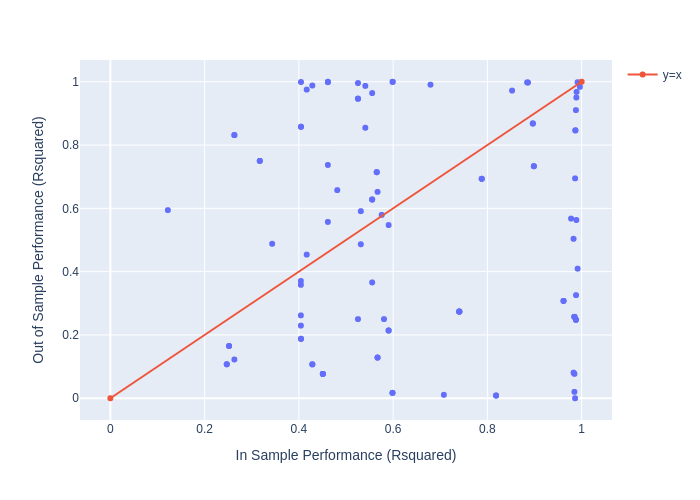

In [28]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

# Define the linear model and dataset
linear_form = 'danceability ~ energy * loudness + energy * mode'
reps = 100  # Number of repetitions
in_sample_Rsquared = np.array([0.0]*reps)
out_of_sample_Rsquared = np.array([0.0]*reps)

# Example dataset 
songs = pd.DataFrame({
    'danceability': [0.6, 0.8, 0.7, 0.5, 0.9, 0.6, 0.7, 0.8, 0.9, 0.5],
    'energy': [0.7, 0.9, 0.6, 0.8, 0.5, 0.7, 0.6, 0.9, 0.8, 0.7],
    'loudness': [-5, -3, -4, -2, -6, -4, -3, -5, -2, -6],
    'mode': ['major', 'minor', 'major', 'minor', 'major', 'major', 'minor', 'major', 'minor', 'major']
})

# Randomly split the data into training and testing sets, and fit the model in each iteration
for i in range(reps):
    songs_training_data, songs_testing_data = train_test_split(songs, train_size=0.7)
    
    # Fit the model to the training data
    final_model_fit = smf.ols(formula=linear_form, data=songs_training_data).fit()
    
    # Collect in-sample R-squared
    in_sample_Rsquared[i] = final_model_fit.rsquared
    
    # Collect out-of-sample R-squared
    out_of_sample_Rsquared[i] = np.corrcoef(songs_testing_data.danceability, 
                                             final_model_fit.predict(songs_testing_data))[0,1]**2

# Create a DataFrame for easy plotting
df = pd.DataFrame({
    "In Sample Performance (Rsquared)": in_sample_Rsquared,
    "Out of Sample Performance (Rsquared)": out_of_sample_Rsquared
})

# Create a scatter plot comparing in-sample vs out-of-sample performance
fig = px.scatter(df, x="In Sample Performance (Rsquared)", 
                 y="Out of Sample Performance (Rsquared)")

# Add a line for perfect prediction (y=x)
fig.add_trace(go.Scatter(x=[0,1], y=[0,1], name="y=x", line_shape='linear'))

# Show the plot
fig.show(renderer="png")


**Explanation of the Code:**
- Multiple iterations: The loop runs 100 times (reps = 100), and for each iteration:
    - A random 70/30 train-test split is created for the dataset (train_test_split(songs, train_size=31)).
    - A model is fit to the training data (smf.ols(formula=linear_form, data=songs_training_data).fit()).
    - The in-sample R-squared is calculated from the training data.
    - The out-of-sample R-squared is computed by comparing the predicted values from the model to the actual values in the testing set.
- Scatter plot: The df DataFrame holds the R-squared values, and the plot shows how in-sample performance compares to out-of-sample performance across multiple splits.

The plot includes a line of perfect agreement (y=x), which helps visualize how often the in-sample and out-of-sample R-squared values are close to each other.

**Purpose of This Demonstration:**

This simulation helps illustrate the variability of model performance across different random splits of the data. The idea is to examine how consistent the model is in terms of generalizing to new, unseen data (out-of-sample R-squared).

- Key Points to Consider:
    - Overfitting: If the model shows a significantly higher in-sample R-squared than out-of-sample R-squared, it could be overfitting. This means the model is capturing patterns that are too specific to the training data and may not generalize well to new data.
    - Underfitting: On the other hand, if both in-sample and out-of-sample R-squared are low, the model is likely underfitting, meaning it’s too simplistic and unable to capture the underlying structure in the data.
    - Model Consistency: Ideally, the in-sample and out-of-sample R-squared values should be relatively close to each other. A large gap between the two metrics suggests that the model is either overfitting (if in-sample is much higher) or underfitting (if both are low).

**What This Demonstrates:**

By running this simulation with multiple random splits, you can observe:
- The robustness of the model across different datasets.
- The stability of performance metrics over repeated splits (which helps us assess the model's true predictive capability).
- Whether the model is overfitting or underfitting in general.

The purpose is to ensure that the model performs well not just on the training data, but that its performance also transfers to new, unseen data. This process is an essential step in assessing model generalizability.

## 9.

In [29]:
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")


'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.35055389205977444 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363354803218 (gen1_predict_future)


In [30]:
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.35055389205977444 (original)
'In sample' R-squared:     0.3904756578094535 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915464343125 (gen1to5_predict_future)


In [31]:
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.29572460427079933 (original)
'In sample' R-squared:     0.4433880517727282 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276128 (gen1_predict_future)


In [32]:
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.29572460427079933 (original)
'In sample' R-squared:     0.33517279824114776 (gen1to5_predict_future)
'Out of sample' R-squared: 0.26262690178799936 (gen1to5_predict_future)


**1. Model Complexity vs. Performance**:
- Model7 is more complex and shows better out-of-sample performance, but it risks overfitting due to its complexity, making it potentially less generalizable.
- The coefficients in Model7 may lack statistical significance, suggesting that many features might not be meaningful outside the training data.

**2. Simplicity and Parsimony**:
- Model6, though simpler, has more statistically significant coefficients and is easier to interpret, which makes it more attractive for real-world applications, where understanding model behavior is crucial.

**3. Generalizability**:
- Generalizability is the ability of a model to perform well on unseen data. The provided code shows how Model6 and Model7 perform on data from future generations, simulating real-world prediction tasks.
- Out-of-sample performance (e.g., R-squared) is key to understanding a model's true predictive power on new data.

**4. Practical Use of Sequential Data**:
- By testing the models on data from future generations, the code demonstrates how models can be used to predict outcomes over time, highlighting the importance of generalizability.

**5. Conclusion: Prefer Simpler Models**:
- Simpler models like Model6 are often preferred because they generalize better, are easier to interpret, and are less prone to overfitting, even if slightly more complex models may show marginally better predictive performance. 

In summary, while complex models can improve accuracy, simpler models are typically favored for their generalizability, interpretability, and stability.

# Chatbot Summary

**All questions in one chatgpt session**

https://chatgpt.com/share/6732c329-86d0-800c-b97e-9014bc082fc9

Here’s a summary of the entire session:

1. **Model Comparison and Performance**:
   - We discussed the extension and development of various models: **model5_linear_form**, **model6_linear_form**, and **model7_linear_form**. Each model built on the previous one, gradually increasing in complexity by adding more variables and interaction terms.
   - **Model7** showed better out-of-sample performance (higher R-squared) than **model6** but had concerns regarding its complexity. The increased number of terms and interactions in **model7** led to more potential for overfitting, despite minimal issues with multicollinearity.
   - We highlighted that **model6** had stronger evidence for its coefficients (based on p-values) and was simpler, making it more interpretable and potentially more reliable in terms of generalizability.

2. **Generalizability and Complexity**:
   - The session emphasized the trade-off between **model performance** and **complexity**. Complex models like **model7** may perform better on the training data but are at risk of detecting **idiosyncratic associations** specific to the training set that do not generalize well to unseen data.
   - **Model6**, on the other hand, was simpler, with fewer interaction terms, making it easier to interpret and potentially offering more consistent performance when generalized to new, unseen data.

3. **Train-Test Split vs Sequential Data Approach**:
   - A major discussion point was the **train-test split** approach, which might not reflect how real-world data is used in practice. Real-world data often comes sequentially, with more data acquired over time, and this approach was used to simulate predictions over time.
   - We then applied both models (**model6** and **model7**) in a more realistic scenario where predictions were made on future data from different **Generations** of the dataset. This sequential approach demonstrated that while both models faced generalizability concerns, **model7** (with its complexity) faced greater challenges in maintaining performance over time compared to **model6**.

4. **Interpretability vs Performance**:
   - The **complexity** of **model7** raised concerns about **interpretability**, particularly with four-way interactions (e.g., Attack:Speed:Q("Sp. Def"):Q("Sp. Atk")), which made it difficult to draw clear conclusions from the model.
   - **Model6** was much easier to interpret, providing a clearer understanding of the relationships between the variables, which is important for decision-making and model deployment in real-world settings.

5. **Final Takeaways**:
   - Simpler models like **model6** are often preferred for their **interpretability**, **generalizability**, and consistency over time. In contrast, more complex models, while potentially offering better performance, may suffer from overfitting and be harder to interpret, especially if they do not generalize well to new data.
   - The discussion reinforced the principle of **parsimony** in model selection: if a simpler model can provide comparable performance, it should be chosen over a more complex one to avoid potential issues like overfitting and loss of interpretability.

Throughout the session, we also worked through various coding examples, demonstrating how to implement and evaluate models using **ols** (Ordinary Least Squares) regression, and analyzed their performance using **in-sample** and **out-of-sample** metrics. The use of **sequential data** for model validation was a key theme in understanding how models might behave in real-world applications.